# Dynamical networks: dynamics of networks
## Spreding on networks 


The main resources on spreading can be found in [1,2].


We start with the simplest class of spreading, viral spreading on a network. This is a similar process to what you might observe in the case of rumor or inovation spreading in a social network. At each step, the "healthy" neighbors of any of the infectious nodes gets infected with fixed probability 𝑝.

For more details on models in this notebook check B.Gonzales tutorials https://github.com/Dataforscience/networks

1. Temporal networks, Saramaki, Holme, https://arxiv.org/abs/1108.1780
2. Spreading, Vespigniani, et al. https://arxiv.org/abs/1408.2701

In [1]:


from collections import Counter
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap


In [9]:
# IMPORTANT
#we import is from the previous notebook dynamical_networks.ipynb
#we use setup from https://github.com/Dataforscience/networks 
from Graph import *

In [12]:

#we add method for viral spreading on a network Graph

@add_method(Graph)
def neighbours(self, node):
    if node in self._edges:
        return list(self._edges[node].keys())
    else:
        return []

@add_method(Graph)
def viral_spread(self, beta, timesteps, seed):
    '''
    parameters of viral spreading:
    beta - parameter of spreading, probability 
    timesteps - number of steps of spreading
    '''
    
    N = len(self._nodes)

    configuration = np.zeros((timesteps, N), dtype='int') # set of values for each node
    configuration[0, seed] = 1

    for t in range(0, timesteps-1):
        configuration[t+1] = np.copy(configuration[t])

        for i in range(N):
            if configuration[t][i] == 1:
                for neighbour in self.neighbours(i):
                    if configuration[t][neighbour] == 0:
                        prob = np.random.random()

                        if prob < beta:
                            configuration[t+1][neighbour] = 1

                        break
    #the program returns a configuration of a network
    return configuration 

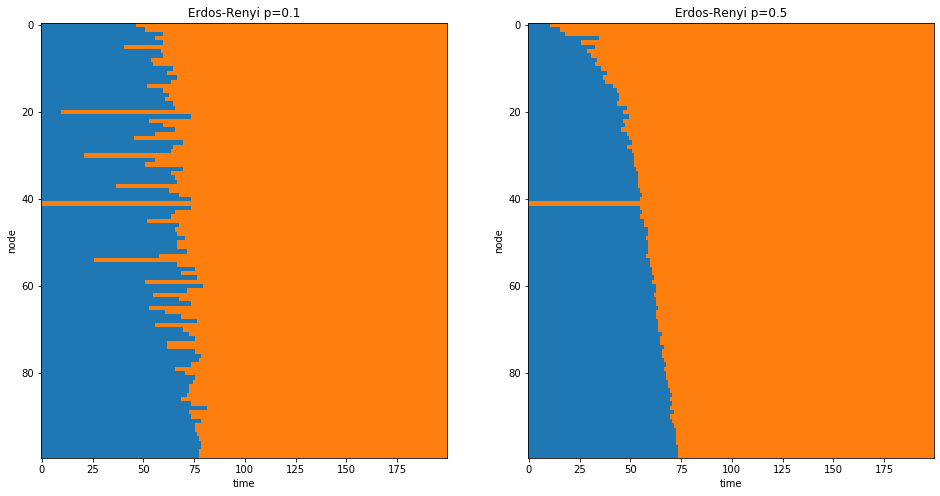

In [17]:
#compare viral spreading on different types of networks

#seed node for spreading
seed = np.random.randint(100)

#WS = Graph.watts_strogatz_graph(100, 4, 0.02)
p1 = 0.1
p2 = 0.5
ER1 = Graph.erdos_renyi_graph(100, p1)
ER2 = Graph.erdos_renyi_graph(100, p2)


# run viral spreading on a network
# result is vector of configuration of network with states

beta = 0.1 # parameter of spreading
ER1_configuration = ER1.viral_spread(0.1, 200, seed)
ER2_configuration = ER2.viral_spread(0.1, 200, seed)


#now we show how spreading can change in time
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
cmap = LinearSegmentedColormap.from_list('d4sci', colors=[colors[0], colors[1]])

fig, ax_lst = plt.subplots(1, 2, figsize=(16, 8))
ax_lst[0].imshow(ER1_configuration.T, aspect='auto', cmap=cmap)
ax_lst[0].set_xlabel('time')
ax_lst[0].set_ylabel('node')
ax_lst[0].set_title('Erdos-Renyi p='+str(p1))

ax_lst[1].imshow(ER2_configuration.T, aspect='auto', cmap=cmap)
ax_lst[1].set_xlabel('time')
ax_lst[1].set_ylabel('node')
ax_lst[1].set_title('Erdos-Renyi p='+str(p2))

plt.show()

# Spreading SIR model 

The SIR model is one of the simplest compartmental models (NOT neccesarily on networks), and many models are derivations of this basic form. The model consists of three compartments– S for the number susceptible, I for the number of infectious, and R for the number recovered (or immune). This model is reasonably predictive for infectious diseases which are transmitted from human to human, and where recovery confers lasting resistance, such as measles, mumps and rubella. 



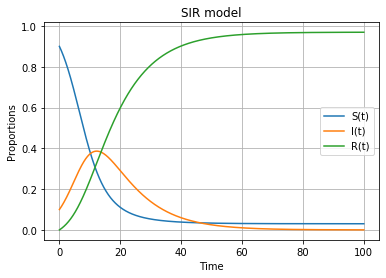

In [5]:
import scipy.integrate
import numpy
import matplotlib.pyplot as plt

def SIR_model(y,t,beta,gamma):
    S,I,R=y
    dS_dt=-beta*S*I
    dI_dt=beta*S*I-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

S0=0.9
I0=0.1
R0=0.0
beta=0.35
gamma=0.1

t=numpy.linspace(0,100,10000)

solution=scipy.integrate.odeint(SIR_model,[S0,I0,R0],t,args=(beta,gamma))
solution=numpy.array(solution)

plt.figure(figsize=[6,4])
plt.plot(t,solution[:,0],label="S(t)")
plt.plot(t,solution[:,1],label="I(t)")
plt.plot(t,solution[:,2],label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()

# Spreading SIR model on networks

In [ ]:
#for this one can install SI, SIR models before in the environment where you run it

from GillEpi import SI, SIS, SIR, SIRS
from GillEpi.agent_based_epidemics import SIR as AB_SIR
from GillEpi.agent_based_epidemics import SIS as AB_SIS

import GillEpi
import matplotlib.pyplot as plt
import networkx as nx

N = 100
k = 8
p = k / (N-1.0)
G = nx.fast_gnp_random_graph(N, p)

R0 = 1.5
recovery_rate = 1.0
infection_rate = R0 * recovery_rate / k
tmax = 1000

sis = GillEpi.SIS(
                  G,
                  infection_rate = infection_rate,
                  recovery_rate = recovery_rate,
                 )

# simulate
sis.simulate(tmax)

# plot infected cluster
i, t = sis.get_i_of_t()
plt.step(t,i)

plt.show()